# Examples for Day 2

In [1]:
# initialization
%matplotlib inline
from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
# %load ml14.py
# Create 2 new features
import pandas as pd
header = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = pd.read_csv('data/pima-indians-diabetes.data.csv', names=header)
bins = [0, 30, 50, 100] 
labels = ['Young', 'Middle-aged', 'Senior']
df['new_feature1'] = pd.cut(df['age'], bins=bins, labels=labels)
df['new_feature2'] = df['mass'].rolling(window=3).mean()
print(df.head())


   preg  plas  pres  skin  test  mass   pedi  age  class new_feature1  \
0     6   148    72    35     0  33.6  0.627   50      1  Middle-aged   
1     1    85    66    29     0  26.6  0.351   31      0  Middle-aged   
2     8   183    64     0     0  23.3  0.672   32      1  Middle-aged   
3     1    89    66    23    94  28.1  0.167   21      0        Young   
4     0   137    40    35   168  43.1  2.288   33      1  Middle-aged   

   new_feature2  
0           NaN  
1           NaN  
2     27.833333  
3     26.000000  
4     31.500000  


In [5]:
# %load ml15.py
# Feature Selection with Univariate Selection
from pandas import read_csv
from sklearn.feature_selection import SelectKBest
# load data
header = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = read_csv('data/pima-indians-diabetes.data.csv', names=header)
X = df.drop(columns=['class'])
y = df['class']
selector = SelectKBest(k=4)
features = selector.fit_transform(X, y)
selected = selector.get_support()
# Show selected features
print([header[i] for i, j in enumerate(selected) if j])


['preg', 'plas', 'mass', 'age']


In [7]:
# %load ml16.py
# Model-based Feature Selection with Random Forest
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = read_csv('data/pima-indians-diabetes.data.csv', names=names)
array = df.values
X = array[:, :-1]
y = array[:, -1]
selector = SelectFromModel(RandomForestClassifier(), threshold='median')
features = selector.fit_transform(X, y)
selected = selector.get_support()
# Show selected features
print([names[i] for i in range(len(names)-1) if selected[i]])


['plas', 'mass', 'pedi', 'age']


In [9]:
# %load ml17.py
# Feature Selection with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
header = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = read_csv('data/pima-indians-diabetes.data.csv', names=header)
X = df.drop(columns=['class'])
y = df['class']
model = DecisionTreeClassifier()
rfe = RFE(model, n_features_to_select=4)
features = rfe.fit_transform(X, y)
selected = rfe.get_support()
# Show selected features
print([header[i] for i, j in enumerate(selected) if j])


['plas', 'mass', 'pedi', 'age']


In [11]:
# %load ml18.py
# Evaluate using a train and a test set
from pandas import read_csv
from sklearn.model_selection import train_test_split as split
from sklearn.neighbors import KNeighborsClassifier
header = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = read_csv('data/pima-indians-diabetes.data.csv', names=header)
X = df.drop(columns=['class'])
y = df['class']
# Split into training and testing sets
X_train, X_test, y_train, y_test = split(X, y, test_size=0.33, random_state=42)
model = KNeighborsClassifier()
model.fit(X_train, y_train)
result = model.score(X_test, y_test)
print(f"Accuracy: {result:.2%}")


Accuracy: 70.08%


In [13]:
# %load ml19.py
# Evaluate using a train and a test set
from pandas import read_csv
from sklearn.model_selection import train_test_split as split
from sklearn.neighbors import KNeighborsClassifier
header = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = read_csv('data/pima-indians-diabetes.data.csv', names=header)
X = df.drop(columns=['class'])
y = df['class']
# Split into training and testing sets
X_train, X_test, y_train, y_test = split(X, y, stratify=y, test_size=0.33, random_state=42)
model = KNeighborsClassifier()
model.fit(X_train, y_train)
result = model.score(X_test, y_test)
print(f"Accuracy: {result:.2%}")


Accuracy: 72.44%


In [15]:
# %load ml20.py
# Evaluate using Cross Validation
from pandas import read_csv
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
header = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = read_csv('data/pima-indians-diabetes.data.csv', names=header)
X = df.drop(columns=['class'])
y = df['class']
model = KNeighborsClassifier()
# Create 3 partitions
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
# Perform 3-fold cross-validation
results = cross_val_score(model, X, y, cv=kfold)
print(f"Accuracy: {results.mean():.2%} ({results.std():.2%})")


Accuracy: 72.14% (1.92%)


In [16]:
from pandas import read_csv
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split as split
from sklearn.neighbors import KNeighborsClassifier

df = read_csv("data/rescale.csv")
df.head()

,feature1,feature2,label
0,-4.083310,-10963.008707,0
1,0.751363,-7153.781270,1
2,5.706203,-7830.473386,1
3,-6.522791,-9145.506169,0
4,-7.362259,2846.910782,2


In [17]:
# Calculate descriptive statistics
df.describe()

,feature1,feature2,label
count,300.000000,300.000000,300.000000
mean,-3.112509,-5458.703355,1.000000
std,5.260577,5641.865215,0.817861
min,-14.482280,-14742.240961,0.000000
25%,-7.036305,-9750.407678,0.000000
50%,-4.439516,-7862.241840,1.000000
75%,1.833269,611.843991,2.000000
max,8.907468,6395.905063,2.000000


In [18]:
# Separate features and target
X = df.drop(columns=['label'])
y = df['label']

# Split to training and testing sets
X_train, X_test, y_train, y_test = split(X, y, test_size=0.25, random_state=42)

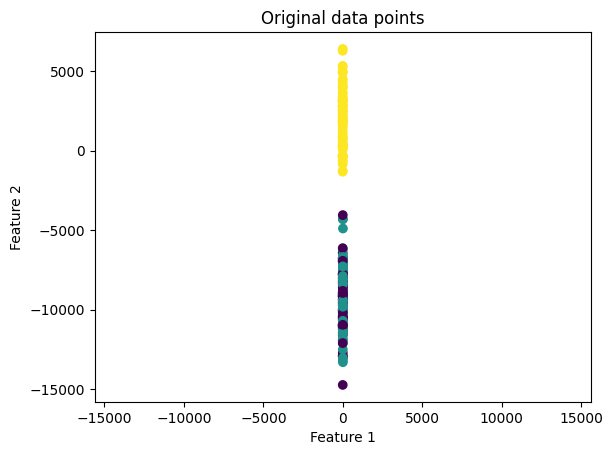

In [27]:
# Plot the features
plt.scatter(X_train['feature1'], X_train['feature2'], c=y_train)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Original data points")
plt.axis('equal')
plt.show()

In [28]:
# Train and evaluate a kNN model
knn1 = KNeighborsClassifier().fit(X_train, y_train)
print(f"knn1 acccuracy: {knn1.score(X_test, y_test):.3%}")

knn1 acccuracy: 66.667%


In [29]:
# Perform feature scaling
scaler = MinMaxScaler()
Xs_train = scaler.fit_transform(X_train)
Xs_test = scaler.transform(X_test)

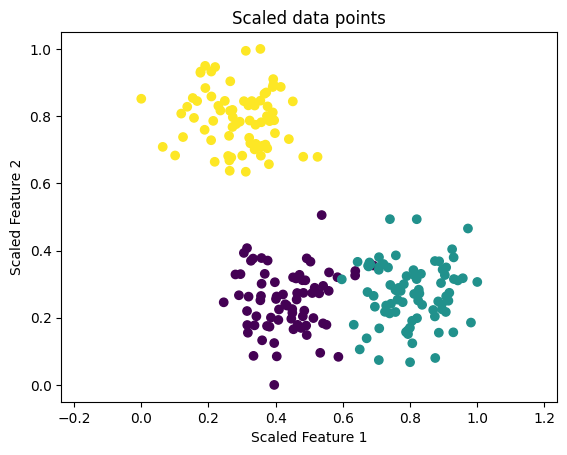

In [32]:
# Plot the features
plt.scatter(Xs_train[:, 0], Xs_train[:, 1], c=y_train)
plt.xlabel("Scaled Feature 1")
plt.ylabel("Scaled Feature 2")
plt.title("Scaled data points")
plt.axis('equal')
plt.show()

In [33]:
# Train and evaluate a kNN model on the scaled features
knn2 = KNeighborsClassifier().fit(Xs_train, y_train)
print(f"knn2 acccuracy: {knn2.score(Xs_test, y_test):.3%}")

knn2 acccuracy: 98.667%


In [34]:
# Evaluate on the training set
print(f"knn2 acccuracy: {knn2.score(Xs_train, y_train):.3%}")

knn2 acccuracy: 98.222%
